In [2]:
from GA import GA
# from Database import Database
import matplotlib.pyplot as plt
import csvFunctions

from Initialization.RandomInitialization import RandomInitialization

from Selections.RouletteSelection import RouletteSelection
from Selections.TournamentSelection import TournamentSelection

from Crossover.SinglePointCrossover import SinglePointCrossover
from Crossover.FastSinglePointCrossover import FastSinglePointCrossover
from Crossover.MultiPointCrossover import MultiPointCrossover

from Mutations.PerGeneMutation import PerGeneMutation

from Termination.FitnessTermination import FitnessTermination
from Termination.GenerationTermination import GenerationTermination
from Termination.ReversedFitnessTermination import ReversedFitnessTermination

from Evaluation.TestEvaluation import TestEvaluation
from Evaluation.RealEvaluation import RealEvaluation
from Evaluation.SumOfDiffEvaluation import SumOfDiffEvaluation
from Evaluation.SumOfDiffEvaluation2 import SumOfDiffEvaluation2

import time



In [3]:
# Create the Database object to send and receive data
#Database = Database()

# A TRIAL is one full iteration of the GA algorithm
Number_of_trials = 1

# Send the robot name to the database
#Robot_UID = Database.Get_Robot_UID("Simulation")

# Population Size / Chromosome Length
Population_size = 10
Chromosome_length = 10
# Total number of Generations
Total_generations = 100

# Mutation rate (Small numbers)
Mutation_rate = 0.03

In [4]:
# ------------ Do not manipulate variables ----------- #

# Trial starting point
Current_trial = 0

while Current_trial < Number_of_trials:
    print("Trial Count: " + str(Current_trial))

    # Start time to see how long it takes in seconds to run
    start = time.time()

    # Start of GA configuration
    ga = GA(Population_size, Chromosome_length, True)

    # Set the GA Configuration
    ga.initialization_impl = RandomInitialization()
    ga.mutation_impl = PerGeneMutation(Mutation_rate)
    ga.selection_impl = TournamentSelection()
    ga.crossover_impl = FastSinglePointCrossover()
    ga.termination_impl = GenerationTermination(Total_generations)
    # ga.evaluation_impl = SumOfDiffEvaluation2(60)
    ga.evaluation_impl = TestEvaluation()
    ga.initialize()

    database_csv = ["Index, Selection, Crossover, Mutation, Evaluation,"
                    " Termination, Elitism, Generation, Fitness, Chromosome"]
    database_index = 0

    # Config UID is check in the database and added if necessary
    #if Current_trial == 0:
        # Config_UID = Database.Get_Config_UID(type(ga.selection_impl).__name__,
                                             # type(ga.crossover_impl).__name__,
                                             # type(ga.mutation_impl).__name__,
                                             # type(ga.evaluation_impl).__name__,
                                             # type(ga.termination_impl).__name__,
                                             # True,
                                             # Population_size,
                                             # Chromosome_length,
                                             # Mutation_rate)

    # Temporary variable to store each generation to add to Database
    # Generation = []
    # Run the GA
    while not ga.is_over():
        ga.evolve()
        best = ga.get_best()
        print("Curent Trial " + str(Current_trial))
        print("Generation #" + str(ga.generation))
        print("\tBest Fitness = " + str(best[1]))

        # ---------- Each Chromosome ---------- #
        for i in range(len(ga.population)):
            chromosome = ga.population[i]
            # Get the fitness of the current chromosome
            fitness = ga.get_fitness(chromosome)
            # Add to Database list
            chromosome_string = ' '.join(map(str, chromosome))

            #chromosome_string = '[' + ','.join(map(str, chromosome)) + ']'

            entry = "{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, \"{9}\"".format(
                database_index,
                type(ga.selection_impl).__name__,
                type(ga.crossover_impl).__name__,
                type(ga.mutation_impl).__name__,
                type(ga.evaluation_impl).__name__,
                type(ga.termination_impl).__name__,
                str(ga.elitism),
                ga.generation,
                fitness,
                str(chromosome_string))

            database_csv.append(entry)
            database_index += 1

            # Database.Add_run(Config_UID, ga.generation, fitness, Current_trial, str(chromosome_string), Robot_UID)
            # Generation.append([ga.generation, fitness, Current_trial, str(chromosome_string), Robot_UID])
            # Print Chromosome - Fitness
            print("\t" + str(ga.population[i]) + " - " + str(ga.get_fitness(ga.population[i])))
            print("\t Chromosome #" + str(i) + " - " + str(ga.get_fitness(ga.population[i])))
        # ---------- Each Generation ---------- #
        # Print the Cache and how many elements
        print("\tCache has " + str(len(ga.fitness_cache.keys())) + " elements.")
        # Add each generation to the database
        # Database.Add_generation(Generation, Config_UID)
        # Empty the generation so we don't add it on the next
        #Generation = []
    # ---------- Each Trial ---------- #
    Current_trial += 1

end = time.time()
print("Simulation took " + str(end - start) + " seconds.")

# End connection
# Database.End_connection()

with open("Database.csv", "w") as write_file:
    for line in database_csv:
        write_file.write(line)
        write_file.write("\n")



Trial Count: 0
Curent Trial 0
Generation #1
	Best Fitness = 93
	[1271, 1269, 1256, 1265, 1254, 1263, 1240, 1249, 1275, 1269] - 101
	 Chromosome #0 - 101
	[1275, 1279, 1267, 1247, 1253, 1267, 1260, 1273, 1256, 1276] - 93
	 Chromosome #1 - 93
	[1252, 1269, 1256, 1265, 1254, 1263, 1240, 1249, 1275, 1269] - 118
	 Chromosome #2 - 118
	[1272, 1262, 1257, 1246, 1271, 1249, 1277, 1260, 1254, 1241] - 131
	 Chromosome #3 - 131
	[1258, 1280, 1243, 1258, 1274, 1258, 1280, 1266, 1253, 1259] - 119
	 Chromosome #4 - 119
	[1245, 1274, 1248, 1248, 1254, 1263, 1240, 1249, 1275, 1269] - 153
	 Chromosome #5 - 153
	[1258, 1280, 1243, 1258, 1253, 1270, 1260, 1273, 1244, 1251] - 136
	 Chromosome #6 - 136
	[1272, 1262, 1257, 1246, 1271, 1249, 1240, 1249, 1275, 1269] - 126
	 Chromosome #7 - 126
	[1258, 1280, 1243, 1258, 1274, 1258, 1280, 1276, 1249, 1257] - 127
	 Chromosome #8 - 127
	[1272, 1255, 1266, 1269, 1247, 1246, 1277, 1256, 1248, 1243] - 139
	 Chromosome #9 - 139
	Cache has 17 elements.
Curent Trial 0


	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #6 - 11
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #7 - 11
	[1270, 1270, 1275, 1272, 1258, 1271, 1272, 1270, 1271, 1270] - 23
	 Chromosome #8 - 23
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #9 - 11
	Cache has 186 elements.
Curent Trial 0
Generation #68
	Best Fitness = 11
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #0 - 11
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #1 - 11
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #2 - 11
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1274] - 15
	 Chromosome #3 - 15
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #4 - 11
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 1270, 1271, 1270] - 11
	 Chromosome #5 - 11
	[1270, 1270, 1275, 1269, 1271, 1271, 1272, 12

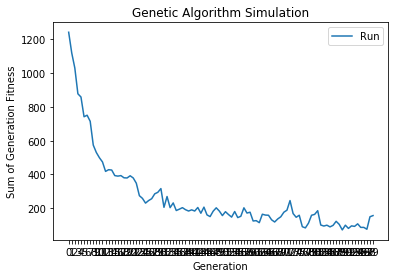

In [5]:
# Plotting Functions
data1 = csvFunctions.Graph_data('Database.csv')

fig, ax = plt.subplots()
ax.set_title("Genetic Algorithm Simulation")
ax.set_xlabel("Generation")
ax.set_ylabel("Sum of Generation Fitness")
ax.plot(data1[0], data1[1], label="Run")
ax.legend()

plt.show()